In [2]:
#数据单位
import pandas as pd
import numpy as np

#数据单位
COLUMN_NAMES=['frame', 'track_id', 'type', 'truncated', 'occluded', 'alpha', 'bbox_left', 'bbox_top','bbox_right', 
              'bbox_bottom', 'height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']
df = pd.read_csv('/home/lee/lee/ROS/data/tracking/training/label_02/0000.txt',header=None,sep=' ')
df.columns = COLUMN_NAMES
df.head()#head()方法，默认读取前五行，如果想显示更多，那么在括号内赋值


,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
0,0,-1,DontCare,-1,-1,-10.000000,219.310000,188.490000,245.500000,218.560000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
1,0,-1,DontCare,-1,-1,-10.000000,47.560000,195.280000,115.480000,221.480000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
2,0,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245


In [3]:
df.type.isin(['Truck','Van','Tram'])
df.loc[df.type.isin(['Truck','Van','Tram']),'type']='Car'  ##将三种类别更改为Car
df = df[df.type.isin(['Car','Pedestrian','Cyclist'])]      ##取出这三种类别的数据
df

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,153,10,Car,0,2,-1.818856,680.294919,177.511028,842.313244,284.070033,1.524000,1.728591,3.894227,2.353367,1.622590,12.436503,-1.637280
1085,153,11,Car,0,2,1.864481,245.920800,194.456182,394.817829,286.444967,1.444000,1.595116,3.791789,-5.458963,1.908188,13.979427,1.497916
1086,153,12,Pedestrian,1,0,0.826456,1185.199080,151.165841,1241.000000,348.552707,1.688000,0.800000,0.884000,5.739732,1.500532,6.279632,1.543272
1087,153,13,Car,0,0,1.773993,344.361560,188.772369,430.531955,248.482384,1.422414,1.512803,3.707634,-6.033258,1.888008,19.788795,1.481180


In [4]:
df.loc[2,['bbox_left' ,'bbox_top','bbox_right','bbox_bottom']]
box=np.array(df.loc[2,['bbox_left' ,'bbox_top','bbox_right','bbox_bottom']])
box

array([296.744956, 161.752147, 455.226042, 292.37280400000003],
      dtype=object)

In [5]:
DETECTION_COLOR_DICT = {'Car':(255,255,0),'Pedestrian':(0,226,255),'Cyclist':(141,40,255)}

In [6]:
import cv2
frame = 120
image = cv2.imread('/home/lee/lee/ROS/data/kitti/2011_09_26/2011_09_26_drive_0005_sync/image_00/data/%010d.png'%frame)
boxes = np.array(df[df['frame']==frame][['bbox_left','bbox_top','bbox_right','bbox_bottom']])
types = np.array(df[df.frame==frame]['type'])

for type,box in zip(types,boxes):
    top_left = int(box[0]),int(box[1])
    bottom_right = int(box[2]),int(box[3])
    cv2.rectangle(image,top_left,bottom_right,DETECTION_COLOR_DICT[type],2)  ##蓝色框 宽度：2
    
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
df[df['frame']==0][['bbox_left','bbox_top','bbox_right','bbox_bottom']] ##也可以写成df[df.frame==0]

,bbox_left,bbox_top,bbox_right,bbox_bottom
2,296.744956,161.752147,455.226042,292.372804
3,737.619499,161.531951,931.112229,374.000000
4,1106.137292,166.576807,1204.470628,323.876144


In [8]:
boxes = np.array(df[df['frame']==0][['bbox_left','bbox_top','bbox_right','bbox_bottom']])
types = np.array(df[df.frame==0]['type'])

In [10]:
list(zip(types,boxes))

[('Car', array([296.744956, 161.752147, 455.226042, 292.372804])),
 ('Cyclist', array([737.619499, 161.531951, 931.112229, 374.      ])),
 ('Pedestrian', array([1106.137292,  166.576807, 1204.470628,  323.876144]))]

In [27]:
import pandas as pd 
import numpy as np 
IMU_COLUMN_NAMES = ['lat','lon','alt','roll','pith','yaw','vn','ve','vf','vl','vu','ax','ay',
                    'az','af','al','au','wx','wy','wz','wf','wl','wu','posacc','velacc','navstat',
                   'numsats','posmode','velmode','orimode']
def read_imu(path):
    df = pd.read_csv(path,header=None,sep=' ')
    df.columns = IMU_COLUMN_NAMES
    return df

def compute_great_circle_distance(lat1,lon1,lat2,lon2):
    """"
    Input:latitudes and longitudes in degree
    Output:distance in meter
    """
    delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180))+ \
                        np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos(lon1*np.pi/180-lon2*np.pi/180)
    return 6371000.0 * np.arccos(np.clip(delta_sigma,-1,1))  ##地球半径, 设定范围


In [28]:
read_imu('/home/lee/lee/ROS/data/kitti/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/0000000000.txt')

,lat,lon,alt,roll,pith,yaw,vn,ve,vf,vl,...,wf,wl,wu,posacc,velacc,navstat,numsats,posmode,velmode,orimode
0,49.011213,8.422885,112.834923,0.022447,0.00001,-1.22191,-3.325632,1.138431,3.514768,0.037625,...,-0.017499,0.021393,0.14563,0.492294,0.068884,4,10,4,4,0


In [37]:
prev_imu_data = None
gps_distances = []
imu_distances = []
for frame in range(150):
    imu_data = read_imu('/home/lee/lee/ROS/data/kitti/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    if prev_imu_data is not None:
        gps_distances += [compute_great_circle_distance(imu_data.lat,imu_data.lon,prev_imu_data.lat,prev_imu_data.lon)]  
        imu_distances += [0.1 * np.linalg.norm(imu_data[['vf','vl']])]
    prev_imu_data = imu_data
    

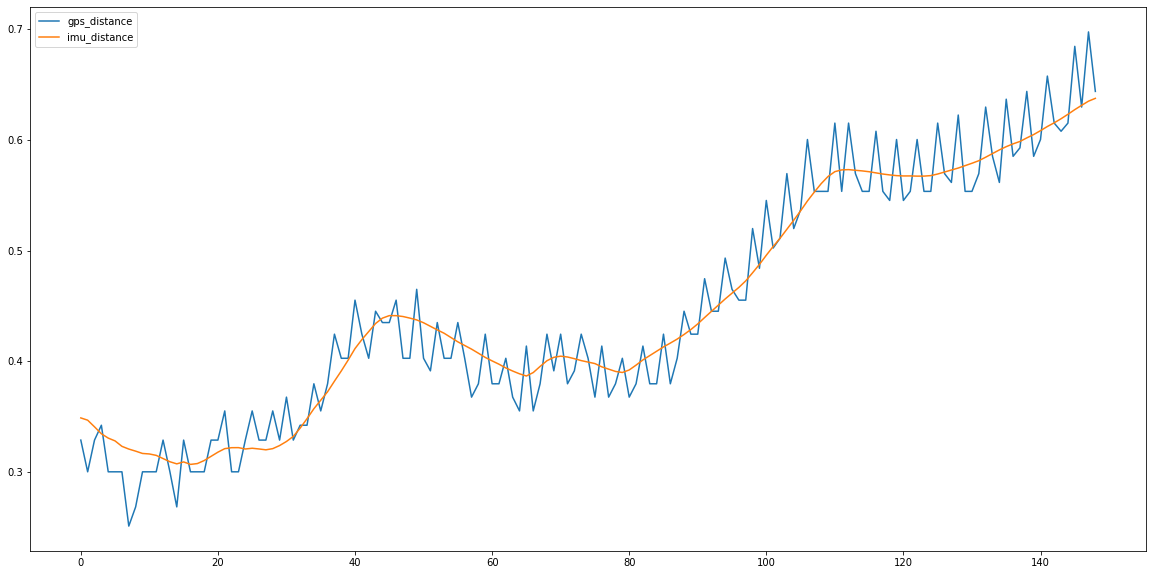

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(gps_distances,label='gps_distance')
plt.plot(imu_distances,label='imu_distance')
plt.legend()
plt.show()

In [56]:
prev_imu_data = None
locations = []

for frame in range(150):
    imu_data = read_imu('/home/lee/lee/ROS/data/kitti/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    if prev_imu_data is not None:
        displacement = 0.1 * np.linalg.norm(imu_data[['vf','vl']])
        yaw_change = float(imu_data.yaw-prev_imu_data.yaw)
        for i in range(len(locations)):
            x0,y0 = locations[i]
            x1 = x0*np.cos(yaw_change)+y0*np.sin(yaw_change)-displacement
            y1 = -x0*np.sin(yaw_change)+y0*np.cos(yaw_change)
            locations[i] = np.array([x1,y1])   
    locations += [np.array([0,0])]   
    prev_imu_data = imu_data

0
0.0
0
0.00434482352170487
0.0
0
0.013002750791207218
0.004316567910839079
0.0
0
0.02746824834772752
0.013914538613170851
0.004757443969881705
0.0
0
0.04462936901796287
0.026711471759464298
0.01321368133240456
0.004189341971692079
0.0
0
0.06593573723601356
0.04365402414067852
0.025815229213233586
0.012523025095508287
0.004142656506051318
0.0
0
0.09306159140864954
0.06612456007400622
0.043654032511471125
0.025807398260715347
0.012953787483954926
0.004388798652776576
0.0
0
0.12029592193291008
0.0893293778583177
0.06284912621739838
0.04105907458338724
0.02433166610391989
0.01193636794545253
0.003745709718546569
0.0
0
0.1508711092109458
0.11592607656056765
0.08548630246056588
0.05980164374521833
0.039247768806614236
0.023068414301049382
0.011121263215429028
0.0036739698527774177
0.0
0
0.18825545931669133
0.1489676246974097
0.11420510051964616
0.08426792355612378
0.05953523066726828
0.03922275139516078
0.023171964373028767
0.011680369579677469
0.003991710951465244
0.0
0
0.22761261392117843

1.9224859068785833
1.7940194989347595
1.6703323055262667
1.5527603920546167
1.4417414821403254
1.335935477696424
1.234851537577564
1.1393990375500378
1.048229100381276
0.9611011630272733
0.8783653920387436
0.7993952692037744
0.7241626303626061
0.6533642517831955
0.5868023477704885
0.5241669930971291
0.4647416743159797
0.4089732904481861
0.35641039376220046
0.3069336788547224
0.2609641658639053
0.21813755150718633
0.17905405614061085
0.14367760824185602
0.11204683684129768
0.08404501403792608
0.060436698983011655
0.04066994661629867
0.024474114575990767
0.01243763622480947
0.004120247229806629
0.0
0
2.0526592837379742
1.9199934877170202
1.7921108788827556
1.670396591759762
1.5552904696579453
1.4454272164929358
1.3403003642152183
1.2408480510743558
1.1456943892476754
1.054592563101268
0.9678948590545624
0.88495569310697
0.8057585310833879
0.7310193618253998
0.6605428392233587
0.5940068172416602
0.5306490137917531
0.47096844628723944
0.41447570954673446
0.36102606370163964
0.3110270963893

5.288534642376787
5.079964319576918
4.876095906637434
4.6792068937717834
4.489763182611619
4.3059627291706635
4.127017027210572
3.9543831318876634
3.7862141106759455
3.6221517513720385
3.462577279866475
3.3065019172943373
3.1541319621581825
3.0065270897447802
2.8635450032807013
2.7246405627313104
2.5882017427280983
2.455707322368127
2.3259584834780984
2.1983291026926968
2.0729566299447413
1.9495010011304434
1.828697398614076
1.7111292417830173
1.5970637979286426
1.4867339635557415
1.3803788879827275
1.2778352517910163
1.1788872358414095
1.083629870960512
0.9912044692729829
0.9018519676492014
0.8152761850081633
0.7310012321045134
0.6488049788378698
0.5693304859138923
0.49324528429904874
0.4206344949809711
0.3520877221221172
0.28751242009722766
0.22762159687930733
0.17378256036650844
0.12584248197808914
0.08440306986552654
0.05101939242346694
0.025460939236507066
0.008127162272068117
0.0
0
5.567589953497517
5.354013499462118
5.145121612676517
4.943251061468414
4.748868506844697
4.5601445

8.518451374830796
8.26136204459153
8.008720428628646
7.763381587051753
7.525811887418071
7.29395482913811
7.0668421793186695
6.846261410334582
6.630087183647626
6.417892221187717
6.210063858504117
6.0053958213518195
5.804253516685498
5.607911573685671
5.4162734339585175
5.2286486413366875
5.04285232131134
4.861039352844981
4.6815266356405205
4.503351735782202
4.326443304248905
4.150493010298046
3.976301551769732
3.80487111844948
3.636621338276822
3.4720255265823994
3.310936618443603
3.153476388476566
2.999477388902095
2.848677443071999
2.6999546631330977
2.55337006346416
2.408483019357208
2.2642902822367614
2.120414250725774
1.9773688759800658
1.8360620816699234
1.6965580706263848
1.5590905118152818
1.42364135020519
1.2908019921304312
1.1617922464041117
1.0369170430467753
0.9169315176027563
0.8033724791527416
0.6964953608111952
0.5971999115296213
0.5069044281045506
0.4247251541984555
0.3505982079171748
0.2852517770393209
0.227605900474706
0.1773067651248645
0.13494524598933175
0.099411

6.28297052730193
6.049225999589225
5.820077092148099
5.598100061600534
5.383763100808308
5.17512901155117
4.971315965693491
4.773952618215891
4.581044712671704
4.39219793097176
4.207798237224216
4.0267437667656605
3.849321261596989
3.6767025256311903
3.508767496258003
3.3448959871980417
3.183182506388511
3.0254503219366646
2.870253245686786
2.716794279622363
2.5651071105079297
2.4148660341158488
2.266842229431916
2.121831020277367
1.9801770138364492
1.8422343114909496
1.7080500657438114
1.577602742975968
1.450699749516652
1.3272579820139465
1.2062833955924837
1.0879280553670105
0.9718222700325275
0.8572244416207705
0.7438337446712299
0.6322315440973422
0.5232084828804496
0.4168396019019723
0.3135391921103288
0.21325153394703728
0.11663200152732725
0.024980214440138676
-0.061628515496300634
-0.14251312946927736
-0.21612081597839922
-0.2824401996934667
-0.3408199850269797
-0.3900557769197276
-0.43113397595972197
-0.4641951862140862
-0.48853850425158696
-0.5053553573623607
-0.515076399770

2.816036402959116
2.6174431321807674
2.423581250629435
2.236610289364812
2.0569942296109254
1.8829861372474777
1.7138345261294614
1.5509283628512547
1.3924805211387428
1.2381472320973002
1.0883070691464338
0.9420161890927089
0.7994500514268437
0.6616235965553056
0.5283864554485858
0.39922305686622084
0.27263582627817484
0.14997013012304083
0.030123261114605726
-0.08746497154317262
-0.2026182531349781
-0.3156812990809152
-0.4259341829735893
-0.5328748121942835
-0.6362657247914965
-0.7359203131155563
-0.8315274805244038
-0.923303708191478
-1.011473095242076
-1.0958735709579288
-1.177310773654671
-1.2555107583972926
-1.3307412813365422
-1.4033768345345001
-1.4736093332338778
-1.5407738799184676
-1.604250937043804
-1.6639517706580236
-1.7192219220638623
-1.770167631059271
-1.8160557448999857
-1.8554964969250314
-1.888728504700248
-1.915181382151493
-1.9333027312793145
-1.943413865123128
-1.945211320939641
-1.9377993737423012
-1.9222901628382534
-1.8989268136075255
-1.8670556252541959
-1.82

-2.4765176572369834
-2.6214143278329853
-2.761520795332799
-2.8953088481695985
-3.02233283398399
-3.144030882320452
-3.2609549626657963
-3.372083193793973
-3.4788696218697543
-3.5815792252338476
-3.679853822270692
-3.774394484496548
-3.8651834978755177
-3.9514490228455728
-4.03337903374598
-4.111331332687633
-4.18620217313093
-4.257339618807023
-4.32534432141223
-4.390435743840916
-4.452246234643591
-4.511137332727441
-4.566479034281963
-4.618185982774964
-4.666174448804986
-4.710493157087083
-4.750476517027008
-4.78660319611676
-4.819134554945683
-4.847575808946968
-4.872451782570714
-4.893328359336715
-4.910325907616909
-4.9233040601144005
-4.932299803631668
-4.936551358030487
-4.9356911830350585
-4.929614115753967
-4.917353172767591
-4.899081183977704
-4.873977869712072
-4.840567074581318
-4.799512594177051
-4.750411621644656
-4.691754278152222
-4.624310612085652
-4.548263601804872
-4.463166122718981
-4.370273140710342
-4.269962169242715
-4.1616620721668856
-4.046848635509521
-3.926

-8.092486273264196
-8.180286718650368
-8.263385130710944
-8.340919247081668
-8.41247496982118
-8.479143653944341
-8.541264706768304
-8.598207527206684
-8.651055084558537
-8.699986983521486
-8.744675957211157
-8.785563535310306
-8.822787313183294
-8.855837471132618
-8.884933155160489
-8.910266478174934
-8.932116421790866
-8.95053125316589
-8.965600747072507
-8.977203382305134
-8.984794975744775
-8.988742562642015
-8.988523550876385
-8.984464058595893
-8.97663373892961
-8.965310726175604
-8.949501891454489
-8.929928566373126
-8.906880711019998
-8.87955217032507
-8.848176269477836
-8.812174961694895
-8.77152034215703
-8.725571170360238
-8.674211300678715
-8.616607096017272
-8.552649452604648
-8.48222029098884
-8.404075445247576
-8.318447816198171
-8.224456620351821
-8.12058589591463
-8.007896382212252
-7.886161957151391
-7.753960438817526
-7.612478696621964
-7.462371402300202
-7.303645185992947
-7.1376569290689025
-6.964904501887731
-6.784915168155561
-6.5992664853543594
-6.40870790019475

-14.244415266753077
-14.27009250371835
-14.291309543030723
-14.307923534405926
-14.319566393014838
-14.326934336058734
-14.330135093274214
-14.328964717154042
-14.324086059156043
-14.315584289806408
-14.303174716407522
-14.287015120457358
-14.267400053616958
-14.244108200768103
-14.217384090535578
-14.187241561298892
-14.153309390489266
-14.116361752008181
-14.075954796649237
-14.031616633864113
-13.982637067117901
-13.929377114691565
-13.871442473027825
-13.809576325948049
-13.744005451861385
-13.675237434472333
-13.601970593386453
-13.525155319251901
-13.445102019942876
-13.360706811739151
-13.271892723090666
-13.17795064569246
-13.078699523688854
-12.972998242309684
-12.86057527596946
-12.740548970224273
-12.613082199775496
-12.478047238784791
-12.333951705893218
-12.181083468806113
-12.01852702796578
-11.844773502921475
-11.661262130359217
-11.467957572750045
-11.263574197735952
-11.049693992827033
-10.82744075963889
-10.597292327183109
-10.360668104078583
-10.11817509326311
-9.869

-19.34762279768608
-19.322445258494852
-19.293109235965524
-19.260057122716
-19.22296680624931
-19.182198359996033
-19.137669574918203
-19.089526423750367
-19.0380762047892
-18.983325685871712
-18.925031381127905
-18.863117828868777
-18.797999515034338
-18.72969372623562
-18.658459701819478
-18.584166766548506
-18.505926660241972
-18.42508223333718
-18.340768614447953
-18.252241770196576
-18.158674134173577
-18.06041326842882
-17.957178008069384
-17.85003116722754
-17.739321207815806
-17.62572920983267
-17.507734914857693
-17.386451358242308
-17.26219809990999
-17.133656725148953
-17.00050113292686
-16.861933087463076
-16.71765197578183
-16.566139547229895
-16.40700506897998
-16.23934902879257
-16.063550395988717
-15.879476681982734
-15.685470263247682
-15.481856614104164
-15.267713940258858
-15.041574989849856
-14.805150875258065
-14.558561401939226
-14.30066196522363
-14.033316474264687
-13.758001413144255
-13.475564336561897
-13.187441451220502
-12.894313581337848
-12.59592867632472

-24.040387747766474
-23.969645343819707
-23.895093645376296
-23.8176966167003
-23.737179648763252
-23.65359199898752
-23.56668106047672
-23.476906826687372
-23.384249179666245
-23.288643805553306
-23.189888969636318
-23.08769949649613
-22.982590830253315
-22.874795885902238
-22.764582471039716
-22.651691511504684
-22.534783066158933
-22.415690080201585
-22.29318247123457
-22.166283525046904
-22.03407459971766
-21.896884716423695
-21.7545402525814
-21.608373845829735
-21.458837708008414
-21.306757473003824
-21.150442889442058
-20.99113381811322
-20.829152252135675
-20.663009751671748
-20.49216071233466
-20.31574084649725
-20.133346839811306
-19.943146910235075
-19.74464958994065
-19.53695567091589
-19.320632760067703
-19.095546483630148
-18.859920010948212
-18.614106893875814
-18.35719651530473
-18.087786158271186
-17.807801671056136
-17.517501077054238
-17.215888360636356
-16.905048461802664
-16.586750029200378
-16.262159720005286
-15.932702652981167
-15.599114000740625
-15.26123986521

-16.14371552889683
-15.781379339116986
-15.418145046037573
-15.05495567896097
-14.691879344219355
-14.329281859774671
-13.967533450888741
-13.60726722342363
-13.248782931302026
-12.891984584282174
-12.537052710931142
-12.18462657368871
-11.834550029701282
-11.486865019817134
-11.14143891142057
-10.794084074566138
-10.443065157175337
-10.089227338521816
-9.73454697918689
-9.38150435198201
-9.031915742445278
-8.686757721593665
-8.346860618109627
-8.012038529069562
-7.682785125382708
-7.361174618674829
-7.046112116516925
-6.7377885516034635
-6.4362214426364
-6.138820510159835
-5.84434690136825
-5.5537701451141395
-5.267387352520548
-4.985627444059582
-4.709580558264173
-4.43906873101531
-4.174271004869536
-3.9157784486018046
-3.6627861895600335
-3.4154485987112535
-3.174510262615631
-2.9392840047396565
-2.710199104359259
-2.488719279217728
-2.2747224878887824
-2.068566811061762
-1.8704199246040245
-1.6812379096740677
-1.5005537612133593
-1.3294567921018228
-1.166866919293486
-1.0132923993

-30.75698078797354
-30.62445657117275
-30.488724139712183
-30.351450139734983
-30.212434588750178
-30.071289709631458
-29.927531501126545
-29.782046547999126
-29.63435646802802
-29.484299216703462
-29.33173748719616
-29.176100566007886
-29.018030268018514
-28.85805486793955
-28.69644632744459
-28.532773226668006
-28.365101916223697
-28.195898426207147
-28.023456926666398
-27.846503258582743
-27.66401808355344
-27.476294789851572
-27.283315560707464
-27.086752093873415
-26.887188738784307
-26.685629500131842
-26.4801954604626
-26.27226785826083
-26.062162653747514
-25.848196777527416
-25.629533004986946
-25.405239827172394
-25.174781827643383
-24.935941548337667
-24.68810076030487
-24.43038705235394
-24.163615749840606
-23.887653777720217
-23.600609351601168
-23.302865003941807
-22.993552486840564
-22.671400661656886
-22.338579838118623
-21.99553417690156
-21.641505110488737
-21.278826196742646
-20.909623667479057
-20.535477169106535
-20.157754487813406
-19.77724540232121
-19.3939380827

-33.96441152862759
-33.804060011770865
-33.64082510428219
-33.47668803234478
-33.31148675647071
-33.14463004297336
-32.97552951918886
-32.805264254317365
-32.63314338944343
-32.458960288592245
-32.282609977463295
-32.10339263021961
-31.922002521915385
-31.739102227155776
-31.554962415058917
-31.369074781527598
-31.17924620259604
-30.988214531772762
-30.794067898691953
-30.595405821935568
-30.39117326958817
-30.18164313272357
-29.96687200512258
-29.74867294352837
-29.52768619488726
-29.304988631099807
-29.078634086997685
-28.850054514955854
-28.619559202349688
-28.385392636819862
-28.146588790251354
-27.9021953450915
-27.651620415798973
-27.392489549991186
-27.12413158899065
-26.84569737463905
-26.55811039270402
-26.26123978704214
-25.953161782841793
-25.634268112856844
-25.303721147872956
-24.96032769560051
-24.606348379338566
-24.242310658451903
-23.867578163543122
-23.484574782055965
-23.095571459170994
-22.70232551313102
-22.306160977996615
-21.90788413812595
-21.507550960132377
-21

-33.112468689565304
-32.958505076088315
-32.80158021775811
-32.64360324380109
-32.48440314139435
-32.32343578336765
-32.16013676509506
-31.995540949139983
-31.829006620764517
-31.66033741500416
-31.489420733972054
-31.315586420800656
-31.139516979168256
-30.961844077436307
-30.782838873810586
-30.60201066822844
-30.417225417719038
-30.231159387626754
-30.041947504049382
-29.84821781832686
-29.648922904677843
-29.44434062987488
-29.234510248920934
-29.021213059518384
-28.805076697106607
-28.587161760971917
-28.365536444884157
-28.14162184792534
-27.91572902978985
-27.68611818223614
-27.451852689859354
-27.211984436049246
-26.965934313712815
-26.7113628926815
-26.447610911303286
-26.17382319351477
-25.890898603957126
-25.59870567776858
-25.295326780534765
-24.98115176732501
-24.65533527881121
-24.316665093689814
-23.967382307007313
-23.607995289304053
-23.237838692716984
-22.859316985628645
-22.474668887517538
-22.08561143848873
-21.69347980636297
-21.299076978463027
-20.90244312683535
-

-29.942340493453706
-29.81108573895952
-29.676608810281135
-29.540561972208003
-29.402743580062143
-29.262775033314824
-29.120177089708285
-28.975827558434098
-28.829257653965655
-28.68030735693855
-28.5288379381387
-28.3742845661077
-28.21728659174143
-28.058366183184248
-27.897795310850526
-27.735146074067067
-27.568496786538212
-27.400300866402358
-27.22886201398153
-27.052911954455215
-26.87143313111725
-26.684719796698168
-26.492750807082945
-26.29719123100782
-26.09862281044852
-25.898046107301262
-25.693585553382583
-25.486619867823883
-25.277465252459173
-25.06444218433099
-24.846719355171004
-24.623366355623062
-24.393850393453167
-24.15596143799918
-23.909083741052243
-23.652344008179508
-23.38655257631605
-23.111576295132554
-22.825525153739814
-22.528781203716658
-22.220474983486444
-21.899332095138657
-21.567518414097936
-21.225474292440307
-20.872435830137075
-20.510732120550255
-20.142482534256672
-19.769258479935413
-19.392429455082485
-19.01278435701416
-18.63030832342

-25.747927523029364
-25.644218711987314
-25.53700199144697
-25.4276169581065
-25.315827274307015
-25.201451363050104
-25.08411319990905
-24.964500282451056
-24.84235013638261
-24.717546504080133
-24.58992084398689
-24.459035798979016
-24.325475838736054
-24.18963102753138
-24.05177252114821
-23.911549017224882
-23.767300935713283
-23.621203798718867
-23.471770719605995
-23.31786353287991
-23.158506409757024
-22.994010948813937
-22.824285150172102
-22.65084663456285
-22.474219416114927
-22.295326979427816
-22.112372060208497
-21.926674594800357
-21.738554772073478
-21.546414854724276
-21.349552720906356
-21.14706482720558
-20.938476286101793
-20.721743540883196
-20.49630599493177
-20.26127473864289
-20.017350781554907
-19.764399858444158
-19.500576722668708
-19.226251768122815
-18.940532859652766
-18.642080807361864
-18.332958983186057
-18.013524925369914
-17.68290386490605
-17.34332114719727
-16.996742072172328
-16.644556650065585
-16.28816582031614
-15.928336786629401
-15.564990095825

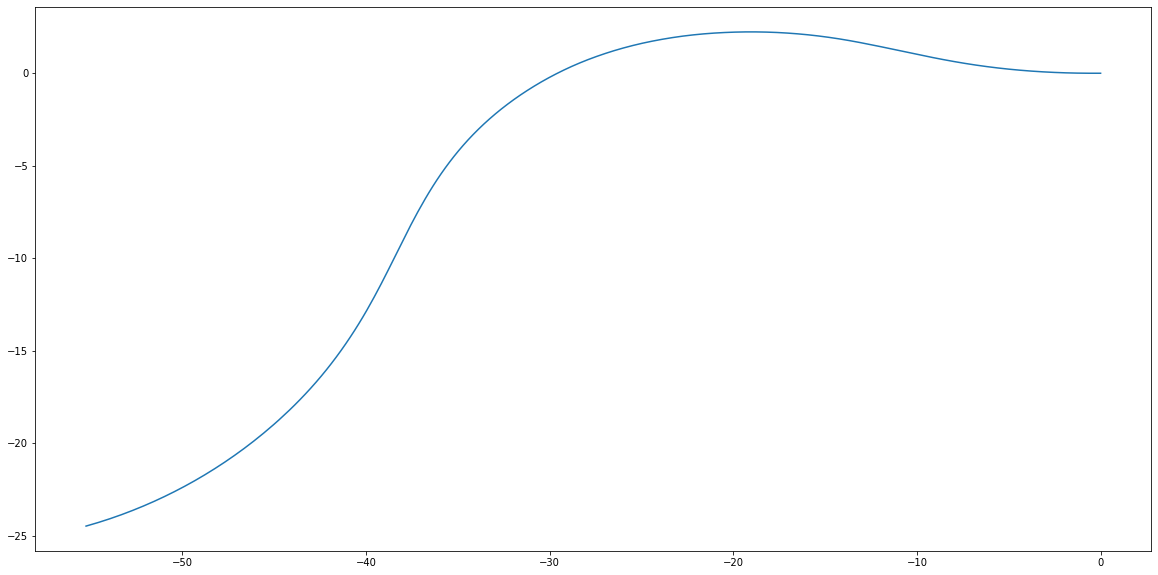

In [51]:
plt.figure(figsize=(20,10))
plt.plot(np.array(locations)[:,0],np.array(locations)[:,1])

In [58]:
locations[2]

array([-54.57791154, -24.2762731 ])